In [17]:
# Import libraries like Pandas (import pandas as pd) for data manipulation and NumPy (import numpy as np) for numerical operations.

import pandas as pd
import numpy as np

# Load data
data = pd.read_csv('/content/drive/MyDrive/Bharat Intern/Task1/data.csv')

# Print the data
print(data.shape)
print(data.head())


(4600, 18)
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated            

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


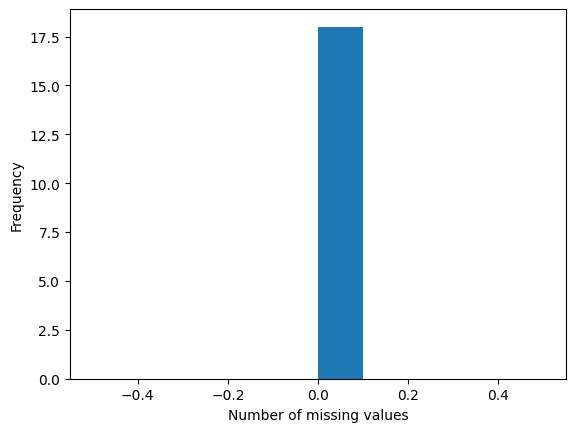

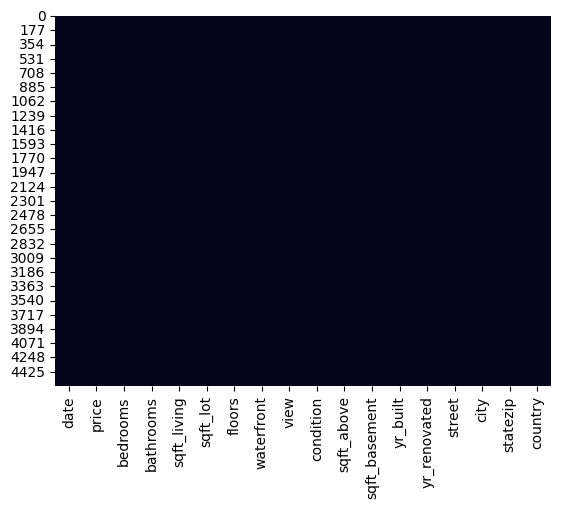

In [18]:
# Identify Missing Values:
# Analyze the distribution of missing values (random, concentrated).

# Check for missing values
missing_values = data.isnull().sum()

# Print the number of missing values per column
print(missing_values)

# Use visualization techniques like histograms or heatmaps
import matplotlib.pyplot as plt

# Histogram of missing values
plt.hist(missing_values)
plt.xlabel("Number of missing values")
plt.ylabel("Frequency")
plt.show()

# Heatmap of missing values
import seaborn as sns

sns.heatmap(data.isnull(), cbar=False)
plt.show()


In [19]:
print(data)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [20]:
# Standardization and Normalization
# Select numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Replace original features with scaled features
data[numerical_features.columns] = scaled_numerical_features


In [21]:
print(data)

                     date     price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00 -0.423864 -0.441122  -0.843204    -0.829971   
1     2014-05-02 00:00:00  3.249598  1.759705   0.432802     1.568528   
2     2014-05-02 00:00:00 -0.372424 -0.441122  -0.205201    -0.217367   
3     2014-05-02 00:00:00 -0.234071 -0.441122   0.113800    -0.144686   
4     2014-05-02 00:00:00 -0.003482  0.659291   0.432802    -0.206984   
...                   ...       ...       ...        ...          ...   
4595  2014-07-09 00:00:00 -0.432437 -0.441122  -0.524202    -0.653458   
4596  2014-07-09 00:00:00 -0.031271 -0.441122   0.432802    -0.705374   
4597  2014-07-09 00:00:00 -0.239562 -0.441122   0.432802     0.904009   
4598  2014-07-10 00:00:00 -0.618268  0.659291  -0.205201    -0.051238   
4599  2014-07-10 00:00:00 -0.587759 -0.441122   0.432802    -0.674224   

      sqft_lot    floors  waterfront      view  condition  sqft_above  \
0    -0.193434 -0.022416   -0.085004 -0.309194  -0

In [22]:
# Feature Engineering: Create new features from existing ones to potentially improve model performance.

# Outlier Treatment: Capping

# Identify outliers using IQR method
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Cap outliers
data['price'] = data['price'].clip(lower=lower_bound, upper=upper_bound)


In [23]:
print(data)

                     date     price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00 -0.423864 -0.441122  -0.843204    -0.829971   
1     2014-05-02 00:00:00  1.066263  1.759705   0.432802     1.568528   
2     2014-05-02 00:00:00 -0.372424 -0.441122  -0.205201    -0.217367   
3     2014-05-02 00:00:00 -0.234071 -0.441122   0.113800    -0.144686   
4     2014-05-02 00:00:00 -0.003482  0.659291   0.432802    -0.206984   
...                   ...       ...       ...        ...          ...   
4595  2014-07-09 00:00:00 -0.432437 -0.441122  -0.524202    -0.653458   
4596  2014-07-09 00:00:00 -0.031271 -0.441122   0.432802    -0.705374   
4597  2014-07-09 00:00:00 -0.239562 -0.441122   0.432802     0.904009   
4598  2014-07-10 00:00:00 -0.618268  0.659291  -0.205201    -0.051238   
4599  2014-07-10 00:00:00 -0.587759 -0.441122   0.432802    -0.674224   

      sqft_lot    floors  waterfront      view  condition  sqft_above  \
0    -0.193434 -0.022416   -0.085004 -0.309194  -0

In [24]:
# creating extra features for better accuracy
# Create new features based on existing ones
data['price_per_bedroom'] = data['price'] / data['bedrooms']
data['price_per_bathroom'] = data['price'] / data['bathrooms']

# Print the new features
print(data.head())


                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00 -0.423864 -0.441122  -0.843204    -0.829971 -0.193434   
1  2014-05-02 00:00:00  1.066263  1.759705   0.432802     1.568528 -0.161718   
2  2014-05-02 00:00:00 -0.372424 -0.441122  -0.205201    -0.217367 -0.080978   
3  2014-05-02 00:00:00 -0.234071 -0.441122   0.113800    -0.144686 -0.190145   
4  2014-05-02 00:00:00 -0.003482  0.659291   0.432802    -0.206984 -0.121306   

     floors  waterfront      view  condition  sqft_above  sqft_basement  \
0 -0.022416   -0.085004 -0.309194  -0.667112   -0.565224      -0.672464   
1  0.906555   -0.085004  4.830079   2.286416    1.789559      -0.069128   
2 -0.951388   -0.085004 -0.309194   0.809652    0.119171      -0.672464   
3 -0.951388   -0.085004 -0.309194   0.809652   -0.959621       1.482306   
4 -0.951388   -0.085004 -0.309194   0.809652   -0.797222       1.051352   

   yr_built  yr_renovated                    street       city  stat

In [25]:
# Convert datetime columns
# Encode categorical variables using one-hot encoding

# Convert datetime columns
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day


data = data.drop('date', axis=1)


# Print the updated data
print(data.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0 -0.423864 -0.441122  -0.843204    -0.829971 -0.193434 -0.022416   -0.085004   
1  1.066263  1.759705   0.432802     1.568528 -0.161718  0.906555   -0.085004   
2 -0.372424 -0.441122  -0.205201    -0.217367 -0.080978 -0.951388   -0.085004   
3 -0.234071 -0.441122   0.113800    -0.144686 -0.190145 -0.951388   -0.085004   
4 -0.003482  0.659291   0.432802    -0.206984 -0.121306 -0.951388   -0.085004   

       view  condition  sqft_above  ...  yr_renovated  \
0 -0.309194  -0.667112   -0.565224  ...      1.221670   
1  4.830079   2.286416    1.789559  ...     -0.825693   
2 -0.309194   0.809652    0.119171  ...     -0.825693   
3 -0.309194   0.809652   -0.959621  ...     -0.825693   
4 -0.309194   0.809652   -0.797222  ...      1.208396   

                     street       city  statezip country price_per_bedroom  \
0      18810 Densmore Ave N  Shoreline  WA 98133     USA          0.960875   
1           70

In [26]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Encode categorical variables
categorical_data = data.select_dtypes(exclude=[np.number])
encoded_data = pd.get_dummies(categorical_data)

# Combine numeric and encoded categorical data
processed_data = pd.concat([numeric_data, encoded_data], axis=1)

# Separate features and target
target = processed_data['price']
features = processed_data.drop('price', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Print the shapes of the training and testing sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (3680, 4664)
Shape of X_test: (920, 4664)
Shape of y_train: (3680,)
Shape of y_test: (920,)


In [27]:
# Decision Trees: Flexible models that can capture non-linear relationships.
# Random Forests: Ensemble methods combining multiple decision trees for improved performance.

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Evaluate the model on the test data
decision_tree_score = decision_tree_model.score(X_test, y_test)

# Print the model score
print(f"Decision Tree score: {decision_tree_score}")

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Evaluate the model on the test data
random_forest_score = random_forest_model.score(X_test, y_test)

# Print the model score
print(f"Random Forest score: {random_forest_score}")


Decision Tree score: 0.9846817449766045
Random Forest score: 0.986053043565998


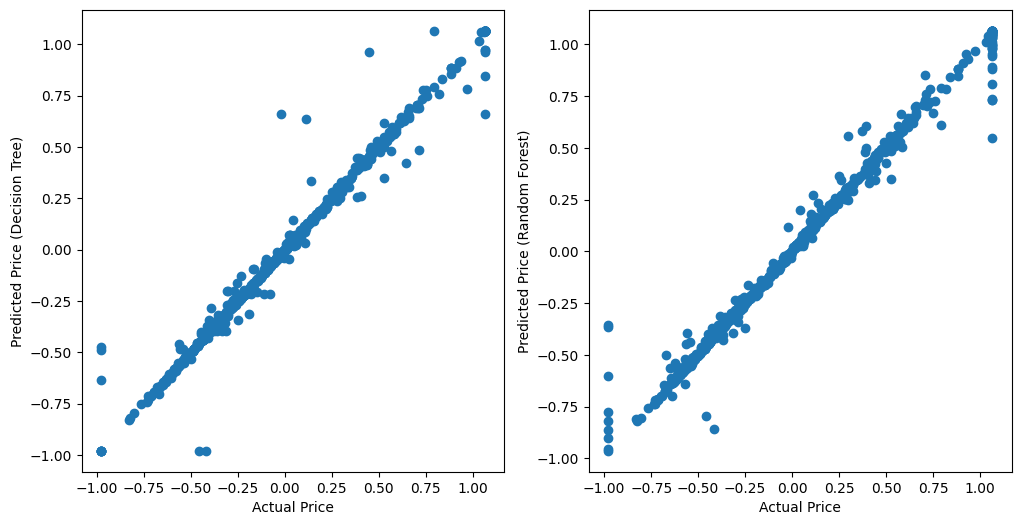

In [28]:
# Evaluate the Model
# Make predictions on the test data using the decision tree model
decision_tree_predictions = decision_tree_model.predict(X_test)

# Make predictions on the test data using the random forest model
random_forest_predictions = random_forest_model.predict(X_test)

# Visualize the actual and predicted values for both models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, decision_tree_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Decision Tree)")

plt.subplot(1, 2, 2)
plt.scatter(y_test, random_forest_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Random Forest)")

plt.show()


In [29]:

# Mean Absolute Error (MAE): Average absolute difference between predicted and actual values.
# Root Mean Squared Error (RMSE): Square root of the average squared difference between predicted and actual values.

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate mean absolute error for both models
decision_tree_mae = mean_absolute_error(y_test, decision_tree_predictions)
random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)

# Calculate root mean squared error for both models
decision_tree_rmse = np.sqrt(mean_squared_error(y_test, decision_tree_predictions))
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_predictions))

# Print the evaluation metrics
print(f"Decision Tree Mean Absolute Error: {decision_tree_mae}")
print(f"Random Forest Mean Absolute Error: {random_forest_mae}")
print(f"Decision Tree Root Mean Squared Error: {decision_tree_rmse}")
print(f"Random Forest Root Mean Squared Error: {random_forest_rmse}")


Decision Tree Mean Absolute Error: 0.014521503849519904
Random Forest Mean Absolute Error: 0.017412158983246804
Decision Tree Root Mean Squared Error: 0.05770415834575093
Random Forest Root Mean Squared Error: 0.05506075793102271


In [30]:

# save as house prediction model usindg pickle

import pickle

# Save the decision tree model
with open('/content/drive/MyDrive/Bharat Intern/Task1/hpm_decision_tree_model.pkl', 'wb') as f:
  pickle.dump(decision_tree_model, f)

# Save the random forest model
with open('/content/drive/MyDrive/Bharat Intern/Task1/hpm_random_forest_model.pkl', 'wb') as f:
  pickle.dump(random_forest_model, f)
